In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,auc

In [3]:
data=pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
data['Age']=data['Age'].fillna(data['Age'].mean())
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
data['Cabin']=data['Cabin'].fillna(data['Cabin'].mode()[0])
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [9]:

data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to the 'Sex' column
data['Sex'] = label_encoder.fit_transform(data['Sex'])

# Check the encoding
print(data[['Sex']].head())


   Sex
0    1
1    0
2    0
3    0
4    1


In [16]:
X=data.drop(columns=['Survived','PassengerId', 'Name', 'Ticket','Cabin','Embarked'])#selecting all the features except target
y=data["Survived"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [26]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
classi=DecisionTreeClassifier(criterion='gini')
classi.fit(X_train,y_train)

DecisionTreeClassifier()

In [27]:
y_pred=classi.predict(X_test)

<Axes: >

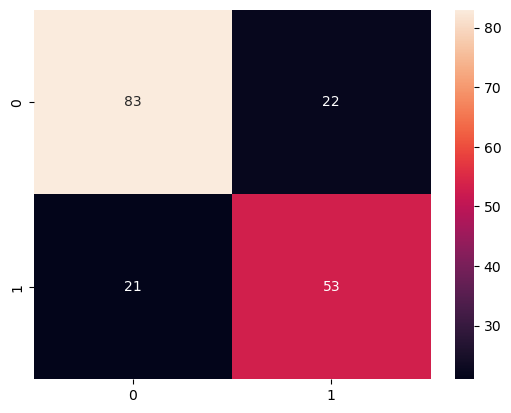

In [28]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [29]:
accuracy_score(y_test,y_pred)

0.7597765363128491

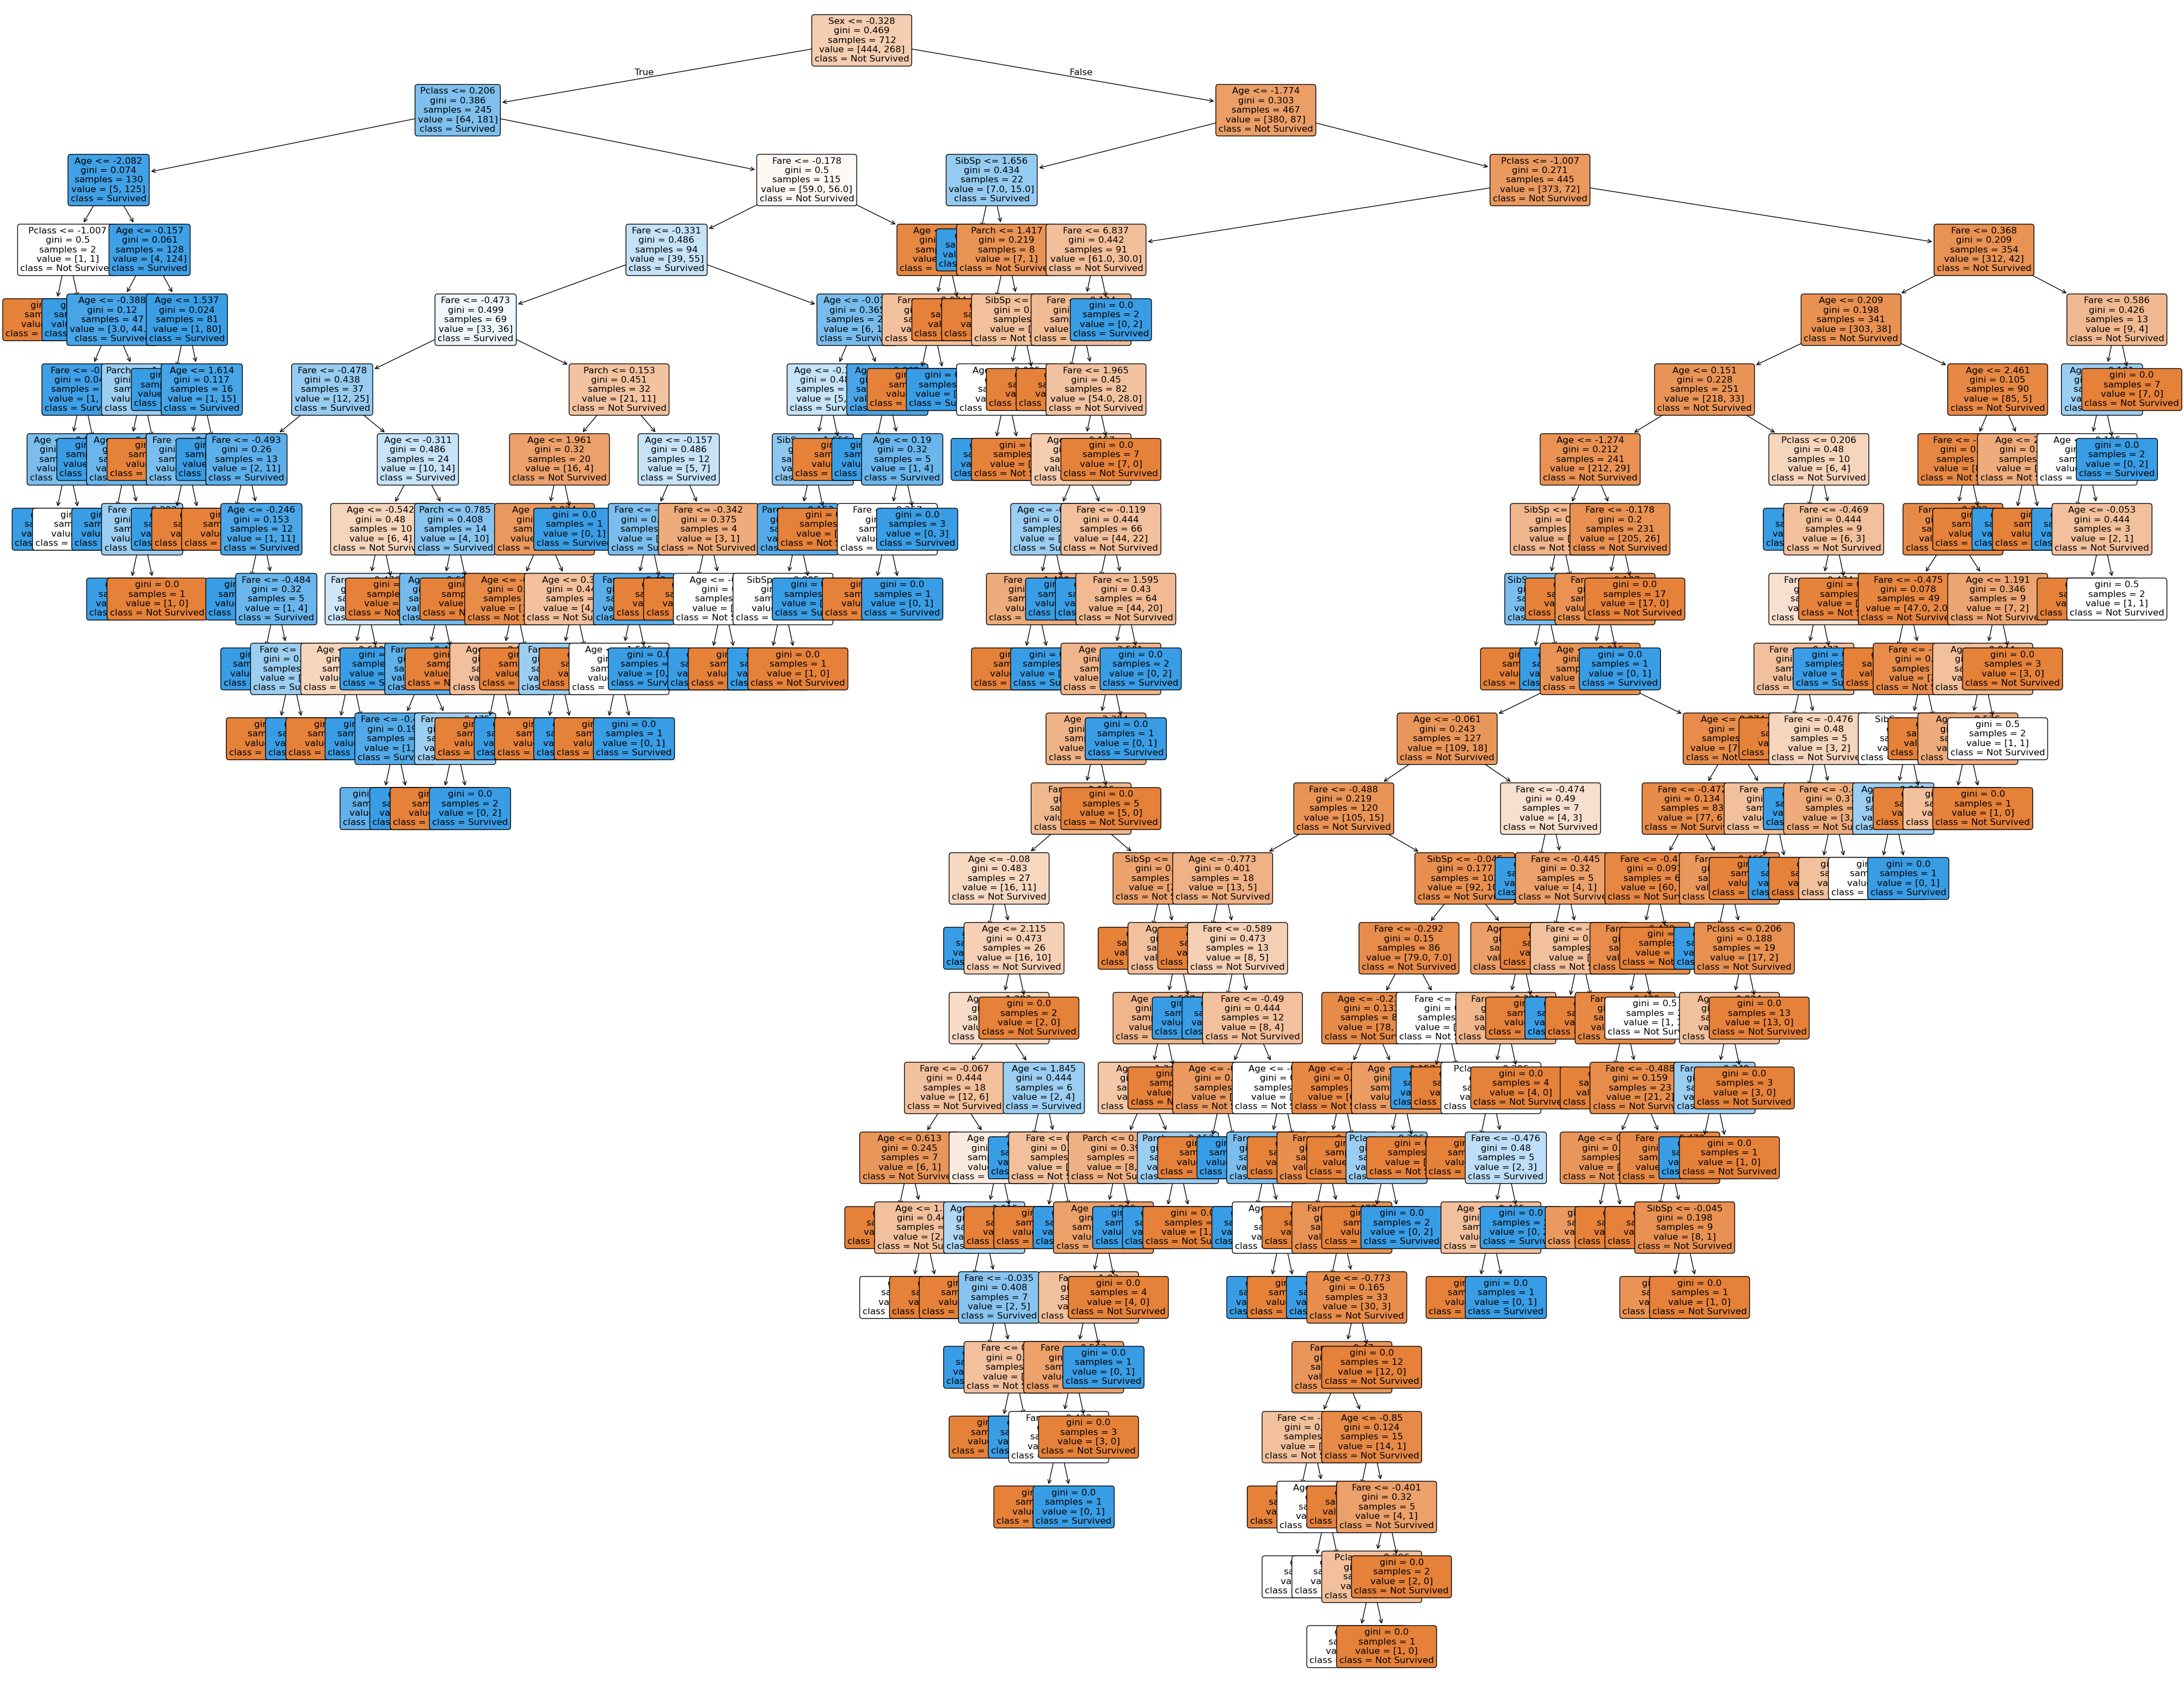

In [39]:
plt.figure(figsize=(50,40))
plot_tree(classi,feature_names=X.columns,class_names=['Not Survived','Survived'],filled=True,rounded=True,fontsize=12)
plt.show()